In [45]:
#import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [46]:
IMG_SIZE = 299   #InceptionV3 image size
BATCH_SIZE = 32

In [47]:
#file path and load the data
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

In [48]:
#preprocessing and data Augmentation for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  #preprocessing specific to InceptionV3 to scale input pixels between -1 and 1
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

In [49]:
# Validation and Test data only need preprocessing (no augmentation)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Flow data from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'       #for multi-class classification
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 18400 images belonging to 8 classes.
Found 2800 images belonging to 8 classes.
Found 2800 images belonging to 8 classes.


In [50]:
#Build the Model

#using typical transfer learning workflow
#1.Instantiate a base model and load pre-trained weights into it.
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
#2.Freeze all layers in the base model by setting trainable = False.
base_model.trainable = False
#3.Create a new model on top of the output of one (or several) layers from the base model.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)   #dropout for regularization
predictions = Dense(8, activation='softmax')(x)  #8 classes for multi-class classification model
#4.Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


#compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_282 (Conv2D)           │ (None, 149, 149, 32)      │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_282       │ (None, 149, 149, 32)      │              96 │ conv2d_282[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_282 (Activation)   │ (None, 149, 149, 32)      │               0 │ batch_normalization_282[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_283 (Conv2D)           │ (None, 147, 147, 32)      │           9,216 │ activation_282[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_283       │ (None, 147, 147, 32)      │              96 │ conv2d_283[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_283 (Activation)   │ (None, 147, 147, 32)      │               0 │ batch_normalization_283[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_284 (Conv2D)           │ (None, 147, 147, 64)      │          18,432 │ activation_283[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_284       │ (None, 147, 147, 64)      │             192 │ conv2d_284[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_284 (Activation)   │ (None, 147, 147, 64)      │               0 │ batch_normalization_284[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_12              │ (None, 73, 73, 64)        │               0 │ activation_284[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_285 (Conv2D)           │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d_12[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_285       │ (None, 73, 73, 80)        │             240 │ conv2d_285[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_285 (Activation)   │ (None, 73, 73, 80)        │               0 │ batch_normalization_285[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_286 (Conv2D)           │ (None, 71, 71, 192)       │         138,24

 Total params: 23,909,160 (91.21 MB)

 Trainable params: 2,106,376 (8.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [52]:
#Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE
)

Epoch 1/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 989s 2s/step - accuracy: 0.5264 - loss: 1.3902 - val_accuracy: 0.7751 - val_loss: 0.6549
Epoch 2/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 774s 1s/step - accuracy: 0.7169 - loss: 0.7153 - val_accuracy: 0.7575 - val_loss: 0.6472
Epoch 3/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.7364 - loss: 0.6726 - val_accuracy: 0.7942 - val_loss: 0.5586
Epoch 4/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.7517 - loss: 0.6350 - val_accuracy: 0.8003 - val_loss: 0.5261
Epoch 5/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 749s 1s/step - accuracy: 0.7670 - loss: 0.6098 - val_accuracy: 0.8118 - val_loss: 0.4884
Epoch 6/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 781s 1s/step - accuracy: 0.7671 - loss: 0.5916 - val_accuracy: 0.8147 - val_loss: 0.4890
Epoch 7/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 812s 1s/step - accuracy: 0.7689 - loss: 0.5963 - val_accuracy: 0.8118 - val_loss: 0.5044
Epoch 8/25
575/575 ━━━━━━━━━━━━━━━━━━━━ 795s 1s/step - accuracy: 0.7798 - loss: 0.5604 - val_accu

In [53]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc:.4f}')

87/87 ━━━━━━━━━━━━━━━━━━━━ 80s 913ms/step - accuracy: 0.8497 - loss: 0.4024 
Test accuracy: 0.8534


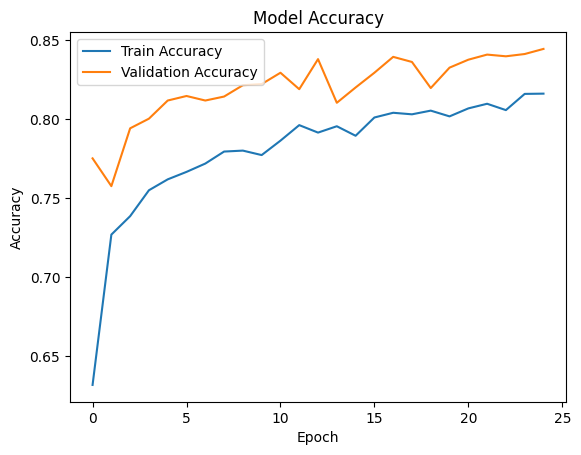

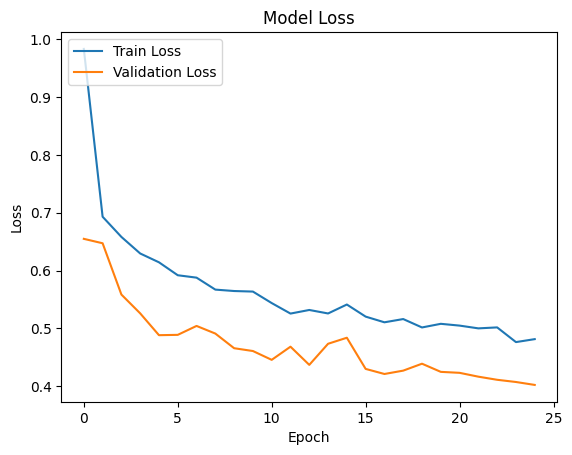

In [55]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

88/88 ━━━━━━━━━━━━━━━━━━━━ 87s 954ms/step 
              precision    recall  f1-score   support

         AMD       0.14      0.14      0.14       350
         CNV       0.14      0.10      0.12       350
         CSR       0.12      0.13      0.12       350
         DME       0.12      0.11      0.11       350
          DR       0.10      0.10      0.10       350
      DRUSEN       0.11      0.13      0.12       350
          MH       0.13      0.14      0.13       350
      NORMAL       0.11      0.12      0.12       350

    accuracy                           0.12      2800
   macro avg       0.12      0.12      0.12      2800
weighted avg       0.12      0.12      0.12      2800



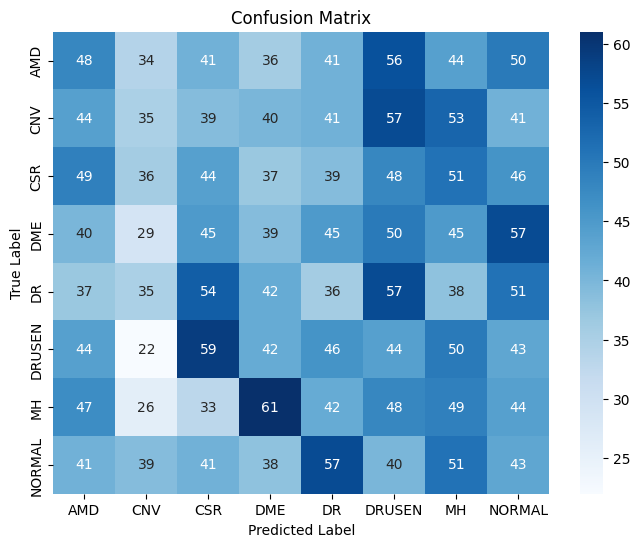

In [57]:
#Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Get true labels
class_names = list(train_generator.class_indices.keys())
y_true = test_generator.classes  # Extracts actual labels

# Get predicted labels
y_pred_probs = model.predict(test_generator)  # Get probability predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


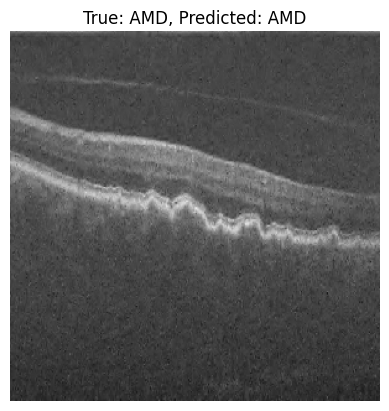

In [66]:
#Visualize Predictions on Sample Images
import random

# Select a random index
idx = random.randint(0, len(test_generator.filenames) - 1)

# Load a batch of images and labels
test_images, test_labels = next(test_generator)

# Get the image and true label
sample_img = test_images[idx % test_generator.batch_size]  # Ensure index is within batch size
true_label = class_names[np.argmax(test_labels[idx % test_generator.batch_size])]

# Predict label
pred_probs = model.predict(sample_img.reshape(1, *sample_img.shape))
pred_label = class_names[np.argmax(pred_probs)]

# Rescale image from [-1, 1] to [0, 1] for correct visualization
sample_img = (sample_img + 1) / 2.0  

# Plot the image
plt.imshow(sample_img)  
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis('off')
plt.show()

In [70]:
#Saving the Model
model_version = InceptionV3
model.export(f"{model_version}")

InvalidArgumentError: Failed to create a directory: <function InceptionV3 at 0x000001E3ED6D6480>; Invalid argument